In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("../modèles/climbing_shoes.pt")


In [8]:
results = model.predict("../img/chausson1.jpg") # accept un path ou un tab de path
result = results[0] # une img donc le resultat est un tableau de longeur 1



image 1/1 c:\Users\Utilisateur\Documents\IA\prg\..\img\chausson1.jpg: 640x640 1 climbing-shoes, 1082.2ms
Speed: 0.0ms preprocess, 1082.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
print(result.names)

{0: 'climbing-shoes'}


In [9]:
filtered_boxes = [box for box in result.boxes if box.conf[0].item() >= 0.5]
result.boxes = filtered_boxes

for box in filtered_boxes:
    class_id = result.names[box.cls[0].item()]
    coordinates = box.xyxy[0].tolist()
    coordinates = [round(x) for x in coordinates]
    confidence = round(box.conf[0].item(), 2)
    
    print("Object type:", class_id)
    print("Coordinates:", coordinates)
    print("Probability:", confidence)
    print("---")

Object type: climbing-shoes
Coordinates: [0, 6, 221, 217]
Probability: 0.88
---


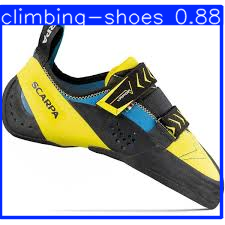

In [10]:
from PIL import Image
Image.fromarray(result.plot()[:, :, ::-1])
